In [1]:
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import shape
from shapely.geometry import shape

from datetime import datetime, timedelta

In [2]:
df_film= pd.read_csv(r'../data/Film_Permits 2018_present.csv')

In [3]:
df_film.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country
0,559223,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 1:00:00 AM,01/19/2021 1:13:21 PM,"Mayor's Office of Film, Theatre & Broadcasting",SHEEPSHEAD BAY ROAD between VOORHIES AVENUE an...,Brooklyn,15,61,Television,Episodic series,United States of America
1,559248,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 2:00:00 AM,01/19/2021 2:33:31 PM,"Mayor's Office of Film, Theatre & Broadcasting",QUEENS PLAZA SOUTH between 21 STREET and 22 ST...,Queens,2,108,Television,Episodic series,United States of America
2,559290,Shooting Permit,01/22/2021 9:00:00 AM,01/22/2021 11:59:00 PM,01/20/2021 10:39:44 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 51 STREET between 9 AVENUE and 10 AVENUE,Manhattan,4,18,Television,Episodic series,United States of America
3,558551,Shooting Permit,01/22/2021 8:00:00 AM,01/22/2021 10:00:00 PM,01/15/2021 10:21:26 AM,"Mayor's Office of Film, Theatre & Broadcasting",BEDFORD AVENUE between LEFFERTS AVENUE and LIN...,Brooklyn,9,71,Television,Episodic series,United States of America
4,558610,Shooting Permit,01/22/2021 8:00:00 AM,01/23/2021 12:00:00 AM,01/15/2021 11:35:16 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 43 STREET between AVENUE OF THE AMERICA...,Manhattan,5,"14, 18",Television,Cable-episodic,United States of America


In [6]:
df_film = df_film[df_film['EndDateTime'] <= '2021-01-04']

In [7]:
df_film.sort_values(by='StartDateTime', ascending=True)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country
11228,447950,Theater Load in and Load Outs,01/01/2019 12:01:00 AM,01/15/2019 11:59:00 PM,10/31/2018 1:57:27 PM,"Mayor's Office of Film, Theatre & Broadcasting",AMSTERDAM AVE. between WEST 61 STREET and WE...,Manhattan,7,20,Theater,Theater,United States of America
2787,524950,Shooting Permit,01/01/2020 2:00:00 PM,01/01/2020 11:59:00 PM,12/30/2019 8:30:00 AM,"Mayor's Office of Film, Theatre & Broadcasting",BROADWAY between WEST 63 STREET and WEST 6...,Manhattan,"4, 5, 2007","18, 20",Film,Feature,United States of America
11227,457258,Shooting Permit,01/02/2019 6:00:00 AM,01/02/2019 10:00:00 PM,12/21/2018 9:55:22 AM,"Mayor's Office of Film, Theatre & Broadcasting","35 STREET between 34 AVENUE and 35 AVENUE, 35...",Queens,1,114,Television,Cable-episodic,United States of America
11226,456642,Theater Load in and Load Outs,01/02/2019 7:00:00 AM,01/02/2019 7:00:00 PM,12/17/2018 9:27:49 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 43 STREET between 8 AVENUE and 9 AVENUE,Manhattan,4,14,Theater,Theater,United States of America
2784,524943,Shooting Permit,01/02/2020 11:00:00 AM,01/02/2020 10:00:00 PM,12/29/2019 8:04:42 PM,"Mayor's Office of Film, Theatre & Broadcasting",EAST 23 STREET between 1 AVENUE and 2 AVENUE,Manhattan,6,13,Film,Feature,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,524944,Theater Load in and Load Outs,12/30/2019 6:00:00 AM,01/01/2020 7:00:00 AM,12/29/2019 8:40:03 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 75 STREET between AMSTERDAM AVENUE and ...,Manhattan,7,20,Theater,Theater,United States of America
11229,455426,Theater Load in and Load Outs,12/31/2018 12:01:00 AM,01/01/2019 6:00:00 AM,12/07/2018 9:06:35 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 55 STREET between 11 AVENUE and 12 AVEN...,Manhattan,4,18,Theater,Theater,United States of America
2789,519839,Theater Load in and Load Outs,12/31/2019 12:01:00 AM,01/01/2020 6:00:00 AM,11/22/2019 10:19:16 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 55 STREET between 11 AVENUE and 12 AVEN...,Manhattan,4,18,Theater,Theater,United States of America
2788,509264,Theater Load in and Load Outs,12/31/2019 12:01:00 AM,01/01/2020 11:59:00 PM,09/19/2019 12:36:26 PM,"Mayor's Office of Film, Theatre & Broadcasting",EAST 11 STREET between 3 AVENUE and 4 AVENUE...,Manhattan,"11, 3","23, 9",Theater,Theater,United States of America


In [8]:
len(df_film)

20164

<AxesSubplot:>

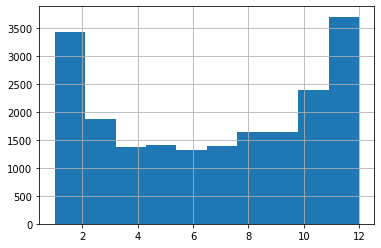

In [9]:
pd.to_datetime(df_film['StartDateTime']).dt.month.hist()

In [10]:
df_film['OFT_Text'] = df_film['ParkingHeld'].str.split(',')
df_film['OFT_Text'] 

0        [SHEEPSHEAD BAY ROAD between VOORHIES AVENUE a...
1        [QUEENS PLAZA SOUTH between 21 STREET and 22 S...
2        [WEST   51 STREET between 9 AVENUE and 10 AVENUE]
3        [BEDFORD AVENUE between LEFFERTS AVENUE and LI...
4        [WEST   43 STREET between AVENUE OF THE AMERIC...
                               ...                        
20159    [DEGRAW STREET between 3 AVENUE and DEAD END, ...
20160    [COVERT STREET between WYCKOFF AVENUE and IRVI...
20161    [BROADWAY between GRAND STREET and HOWARD STRE...
20162    [35 STREET between 34 AVENUE and 35 AVENUE,   ...
20163     [WEST   48 STREET between 6 AVENUE and 7 AVENUE]
Name: OFT_Text, Length: 20164, dtype: object

In [29]:
# import pickle

In [11]:
# create the cache-like database to store the query.

data = {}

def getOFT(url):
    
    data = oft_lookup.get(url)
    if url not in oft_lookup:
        r = requests.get(url)
        data = r.json()
        oft_lookup[url] = data
        
    return data    

In [57]:
segidlookup=[]
oft_lookup = {}
def getGeom(row):
    boro = row['Borough']
    #print(boro)
    segids = []
    for oft in row['OFT_Text']:
        oft_1 = oft.strip()
        try:
            on_street = oft_1.split('between')[0]
            from_street, to_street  = oft_1.split('between')[1].split('and')

            #print(on_street, from_street, to_street)

            url = f'https://www.locationservice.nyc/locationserviceapi//api/Block?OnStreet={on_street}&CrossStreetOne={from_street}&CrossStreetTwo={to_street}&Borough={boro}&BlockType=ExtendedStretch&ExtendedStretchType=Blockface&'
            data = getOFT(url)
            #print(data)
            if 'BlockFaceList' in data:
                for i in data['BlockFaceList']:
                    if 'SegmentID' in i:
                        segids.append(i['SegmentID'])
                        segidlookup.append({
                            'EventID': row['EventID'],
                            'SegmentID': i['SegmentID']
                        })
        except:
            #print(oft_1)
            continue
    return segids
      
df_film['segids'] = df_film.apply(getGeom, axis = 1)

In [58]:
df_film

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,OFT_Text,segids
0,559223,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 1:00:00 AM,01/19/2021 1:13:21 PM,"Mayor's Office of Film, Theatre & Broadcasting",SHEEPSHEAD BAY ROAD between VOORHIES AVENUE an...,Brooklyn,15,61,Television,Episodic series,United States of America,[SHEEPSHEAD BAY ROAD between VOORHIES AVENUE a...,"[0108149, 0115148, 0026080, 0026083, 0127321, ..."
1,559248,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 2:00:00 AM,01/19/2021 2:33:31 PM,"Mayor's Office of Film, Theatre & Broadcasting",QUEENS PLAZA SOUTH between 21 STREET and 22 ST...,Queens,2,108,Television,Episodic series,United States of America,[QUEENS PLAZA SOUTH between 21 STREET and 22 S...,[]
2,559290,Shooting Permit,01/22/2021 9:00:00 AM,01/22/2021 11:59:00 PM,01/20/2021 10:39:44 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 51 STREET between 9 AVENUE and 10 AVENUE,Manhattan,4,18,Television,Episodic series,United States of America,[WEST 51 STREET between 9 AVENUE and 10 AVENUE],[0033977]
3,558551,Shooting Permit,01/22/2021 8:00:00 AM,01/22/2021 10:00:00 PM,01/15/2021 10:21:26 AM,"Mayor's Office of Film, Theatre & Broadcasting",BEDFORD AVENUE between LEFFERTS AVENUE and LIN...,Brooklyn,9,71,Television,Episodic series,United States of America,[BEDFORD AVENUE between LEFFERTS AVENUE and LI...,"[0029490, 0029273, 0029280, 0109171, 0028388, ..."
4,558610,Shooting Permit,01/22/2021 8:00:00 AM,01/23/2021 12:00:00 AM,01/15/2021 11:35:16 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 43 STREET between AVENUE OF THE AMERICA...,Manhattan,5,"14, 18",Television,Cable-episodic,United States of America,[WEST 43 STREET between AVENUE OF THE AMERIC...,"[0034189, 0034194, 0035787, 0034192, 0034197, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20159,391005,Shooting Permit,01/04/2018 7:00:00 AM,01/04/2018 11:00:00 PM,01/03/2018 11:21:59 AM,"Mayor's Office of Film, Theatre & Broadcasting","DEGRAW STREET between 3 AVENUE and DEAD END, ...",Brooklyn,6,78,Television,Cable-episodic,United States of America,"[DEGRAW STREET between 3 AVENUE and DEAD END, ...","[0022688, 0022660, 0022661]"
20160,390906,Shooting Permit,01/04/2018 6:30:00 AM,01/04/2018 9:00:00 PM,01/02/2018 2:50:09 PM,"Mayor's Office of Film, Theatre & Broadcasting",COVERT STREET between WYCKOFF AVENUE and IRVIN...,Queens,"4, 5","104, 83",Television,Episodic series,United States of America,[COVERT STREET between WYCKOFF AVENUE and IRVI...,[0048509]
20161,390784,Shooting Permit,01/04/2018 6:00:00 AM,01/04/2018 8:00:00 PM,01/02/2018 7:41:45 AM,"Mayor's Office of Film, Theatre & Broadcasting",BROADWAY between GRAND STREET and HOWARD STREE...,Manhattan,2,"1, 5",WEB,Not Applicable,United States of America,[BROADWAY between GRAND STREET and HOWARD STRE...,"[0032097, 0032327]"
20162,391010,Shooting Permit,01/04/2018 6:00:00 AM,01/04/2018 10:00:00 PM,01/03/2018 11:31:29 AM,"Mayor's Office of Film, Theatre & Broadcasting","35 STREET between 34 AVENUE and 35 AVENUE, 35...",Queens,1,114,Television,Cable-episodic,United States of America,"[35 STREET between 34 AVENUE and 35 AVENUE, ...","[0067758, 0067649]"


In [59]:
df_segidlookup = pd.DataFrame(segidlookup)
df_segidlookup

,EventID,SegmentID
0,559223,0108149
1,559223,0115148
2,559223,0026080
3,559223,0026083
4,559223,0127321
...,...,...
80582,390784,0032097
80583,390784,0032327
80584,391010,0067758
80585,391010,0067649


In [60]:
df_film_seg = df_film.merge(df_segidlookup,how='left',on='EventID')

In [62]:
df_film_seg

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,OFT_Text,segids,SegmentID
0,559223,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 1:00:00 AM,01/19/2021 1:13:21 PM,"Mayor's Office of Film, Theatre & Broadcasting",SHEEPSHEAD BAY ROAD between VOORHIES AVENUE an...,Brooklyn,15,61,Television,Episodic series,United States of America,[SHEEPSHEAD BAY ROAD between VOORHIES AVENUE a...,"[0108149, 0115148, 0026080, 0026083, 0127321, ...",0108149
1,559223,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 1:00:00 AM,01/19/2021 1:13:21 PM,"Mayor's Office of Film, Theatre & Broadcasting",SHEEPSHEAD BAY ROAD between VOORHIES AVENUE an...,Brooklyn,15,61,Television,Episodic series,United States of America,[SHEEPSHEAD BAY ROAD between VOORHIES AVENUE a...,"[0108149, 0115148, 0026080, 0026083, 0127321, ...",0115148
2,559223,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 1:00:00 AM,01/19/2021 1:13:21 PM,"Mayor's Office of Film, Theatre & Broadcasting",SHEEPSHEAD BAY ROAD between VOORHIES AVENUE an...,Brooklyn,15,61,Television,Episodic series,United States of America,[SHEEPSHEAD BAY ROAD between VOORHIES AVENUE a...,"[0108149, 0115148, 0026080, 0026083, 0127321, ...",0026080
3,559223,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 1:00:00 AM,01/19/2021 1:13:21 PM,"Mayor's Office of Film, Theatre & Broadcasting",SHEEPSHEAD BAY ROAD between VOORHIES AVENUE an...,Brooklyn,15,61,Television,Episodic series,United States of America,[SHEEPSHEAD BAY ROAD between VOORHIES AVENUE a...,"[0108149, 0115148, 0026080, 0026083, 0127321, ...",0026083
4,559223,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 1:00:00 AM,01/19/2021 1:13:21 PM,"Mayor's Office of Film, Theatre & Broadcasting",SHEEPSHEAD BAY ROAD between VOORHIES AVENUE an...,Brooklyn,15,61,Television,Episodic series,United States of America,[SHEEPSHEAD BAY ROAD between VOORHIES AVENUE a...,"[0108149, 0115148, 0026080, 0026083, 0127321, ...",0127321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81987,390784,Shooting Permit,01/04/2018 6:00:00 AM,01/04/2018 8:00:00 PM,01/02/2018 7:41:45 AM,"Mayor's Office of Film, Theatre & Broadcasting",BROADWAY between GRAND STREET and HOWARD STREE...,Manhattan,2,"1, 5",WEB,Not Applicable,United States of America,[BROADWAY between GRAND STREET and HOWARD STRE...,"[0032097, 0032327]",0032097
81988,390784,Shooting Permit,01/04/2018 6:00:00 AM,01/04/2018 8:00:00 PM,01/02/2018 7:41:45 AM,"Mayor's Office of Film, Theatre & Broadcasting",BROADWAY between GRAND STREET and HOWARD STREE...,Manhattan,2,"1, 5",WEB,Not Applicable,United States of America,[BROADWAY between GRAND STREET and HOWARD STRE...,"[0032097, 0032327]",0032327
81989,391010,Shooting Permit,01/04/2018 6:00:00 AM,01/04/2018 10:00:00 PM,01/03/2018 11:31:29 AM,"Mayor's Office of Film, Theatre & Broadcasting","35 STREET between 34 AVENUE and 35 AVENUE, 35...",Queens,1,114,Television,Cable-episodic,United States of America,"[35 STREET between 34 AVENUE and 35 AVENUE, ...","[0067758, 0067649]",0067758
81990,391010,Shooting Permit,01/04/2018 6:00:00 AM,01/04/2018 10:00:00 PM,01/03/2018 11:31:29 AM,"Mayor's Office of Film, Theatre & Broadcasting","35 STREET between 34 AVENUE and 35 AVENUE, 35...",Queens,1,114,Television,Cable-episodic,United States of America,"[35 STREET between 34 AVENUE and 35 AVENUE, ...","[0067758, 0067649]",0067649


In [63]:
df_film_seg.to_csv('../data/film permit_city_seg_2018.csv')  

In [64]:
lion = gpd.read_file("../vector/lion_line" )

In [65]:
lion_sel = lion[['OBJECTID','SegmentID','Join_ID','geometry']]
lion_sel.head()

,OBJECTID,SegmentID,Join_ID,geometry
0,1.0,0078126,2251001000000,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,2.0,0079796,2798401000000,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,3.0,0077356,2728001000000,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,4.0,0077356,21279502000000X,"LINESTRING (1011600.676 239639.743, 1011785.79..."
4,5.0,0077356,21279503000000X,"LINESTRING (1011600.676 239639.743, 1011785.79..."


In [66]:
df_film_lion = df_film_seg.merge(lion_sel,how='left',on='SegmentID')
df_film_lion.head(2)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,OFT_Text,segids,SegmentID,OBJECTID,Join_ID,geometry
0,559223,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 1:00:00 AM,01/19/2021 1:13:21 PM,"Mayor's Office of Film, Theatre & Broadcasting",SHEEPSHEAD BAY ROAD between VOORHIES AVENUE an...,Brooklyn,15,61,Television,Episodic series,United States of America,[SHEEPSHEAD BAY ROAD between VOORHIES AVENUE a...,"[0108149, 0115148, 0026080, 0026083, 0127321, ...",0108149,41559.0,3703201000000,"LINESTRING (997364.767 153166.254, 997613.031 ..."
1,559223,Shooting Permit,01/22/2021 10:00:00 AM,01/23/2021 1:00:00 AM,01/19/2021 1:13:21 PM,"Mayor's Office of Film, Theatre & Broadcasting",SHEEPSHEAD BAY ROAD between VOORHIES AVENUE an...,Brooklyn,15,61,Television,Episodic series,United States of America,[SHEEPSHEAD BAY ROAD between VOORHIES AVENUE a...,"[0108149, 0115148, 0026080, 0026083, 0127321, ...",0115148,58506.0,3804801000000,"LINESTRING (997060.499 152673.840, 997307.372 ..."


In [67]:
df_film_lion['geometry'].isnull().sum(axis = 0)

4108

In [70]:
len(df_film_lion[df_film_lion['geometry'].isnull()==True])/len(df_film_lion)

0.04127149975888121

In [72]:
gdf_film_lion = gpd.GeoDataFrame(df_film_lion, crs="EPSG:4326").set_geometry('geometry')
gdf_film_lion_output = gdf_film_lion.drop(columns=['OFT_Text','segids'])
gdf_film_lion_output.to_file('../output/film permit_city_from 2018.shp')  

# Segment Count

In [74]:
# df_seg_count = df_film_seg[['EventID','SegmentID']].groupby('SegmentID').count()
# df_seg_count = df_seg_count.rename(columns={'EventID':'counts'}).reset_index()
# df_seg_count.sort_values(by='counts', ascending=False)

,SegmentID,counts
3016,0035681,349
2951,0035515,229
2955,0035520,220
2947,0035511,208
2945,0035507,173
...,...,...
5435,0075582,1
2339,0033278,1
5437,0075592,1
5438,0075616,1


In [75]:
# df_film_lion_count = df_seg_count.merge(lion_sel,how='left',on='SegmentID')
# df_film_lion_count = gpd.GeoDataFrame(df_film_lion_count, crs="EPSG:4326").set_geometry('geometry')
# df_film_lion_count.to_file('../output/permit_city_segment_count.shp')  